# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)

#def load_housing_data(housing_path=HOUSING_PATH):
#    csv_path = os.path.join(housing_path, "housing.csv")
#    return pd.read_csv(csv_path)

DATASET_PATH = "datasets/uci/"
def load_uci_data(path):
    csv_path = os.path.join(DATASET_PATH, path)
    return pd.read_csv(csv_path)

In [5]:
#housing = load_housing_data()
#housing.head()

#Otros candidatos a agregar:

# Producto 11: Incidencia por region
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto11

# Producto 26: Casos nuevos con sintomas por region
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto26

# Producto 27: Casos nuevos sin sintomas por region
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto27

# Producto 38: Casos fallecidos por comuna (usar CasosFallecidosPorComuna_std)
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto38

# -------------------------------------------------------------------------------

# Producto 8: Pacientes COVID UCI (RM)
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto8
uci_region = load_uci_data("UCI_T.csv")

# Producto 19: Casos activos (RM)
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
casos_activos = load_uci_data("ActivosComuna_std.csv") #Nuevo

# Producto 20: Número de ventiladores
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto20
vent_disp = load_uci_data("NumeroVentiladores_T.csv")

# Producto 23: Pacientes críticos
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto23
uci_covid_nacional = load_uci_data("PacientesCriticos_T.csv")

# Producto 24: Camas Hospital Diario
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto24
camas = load_uci_data("CamasHospital_Diario_T.csv")

# Producto 35: Comorbilidad
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto35
comorb_nacional = load_uci_data("Comorbilidad_T.csv")

# Producto 37: Defunciones
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto37
defunc_nacional = load_uci_data("Defunciones_T.csv")

# Productos 38: Casos fallecidos por comuna
#https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto38
defunc_regional = load_uci_data("CasosFallecidosComuna_std.csv")   

# Producto 44: Evolución semanal de egresos hospitalarios pacientes COVID-19
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto44
egresos_nacional = load_uci_data("Egresos_std.csv") #Nuevo

# Producto 52: Camas Hospital (RM)
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto52
camas_region = load_uci_data("CamasHospital_Regional_std.csv")

# Producto 74: Paso a paso
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto74
paso_a_paso = load_uci_data("paso_a_paso_T.csv")

# Producto 76: Avance en Campaña de Vacunación COVID-19
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto76
Vacunacion = pd.read_csv(os.path.join("datasets/uci/", "vacunacion_t.txt"), sep=",", header=None)

## Limpieza de datos

In [6]:
comorb_nacional.columns

Index(['Comorbilidad', 'Hipertensión arterial', 'Diabetes', 'Obesidad', 'Asma',
       'Enfermedad cardiovascular', 'Enfermedad pulmonar crónica',
       'Cardiopatía crónica', 'Enfermedad renal crónica',
       'Enfermedad neurológica crónica', 'Inmunocomprometido',
       'Enfermedad hepática crónica', 'Hipertensión arterial.1', 'Diabetes.1',
       'Obesidad.1', 'Asma.1', 'Enfermedad cardiovascular.1',
       'Enfermedad pulmonar crónica.1', 'Cardiopatía crónica.1',
       'Enfermedad renal crónica.1', 'Enfermedad neurológica crónica.1',
       'Inmunocomprometido.1', 'Enfermedad hepática crónica.1'],
      dtype='object')

In [7]:
from statistics import mode

camas_region = camas_region[camas_region["Region"].str.match("Metropolitana")]
camas_region = camas_region.groupby(["Fecha", "Serie"])["Fecha", "Serie", "Casos"].sum().reset_index()
camas_region = camas_region.pivot_table(index=['Fecha'], columns=['Serie'], values='Casos').fillna(0)
#camas_region.set_index(camas_region["Fecha"], inplace=True)
#camas_region.drop(axis=1, labels="Fecha", inplace=True)
camas_region.drop(axis=1, labels="Camas base (2019)", inplace=True)

camas_region.index.name=None

#Tenemos tambien las camas nacionales, pero es preferible usar las regionales
camas.columns = ['Fecha', 'Camas basicas nac.', 'Camas medias nac.', 'Camas UTI nac.', 'Camas UCI nac.']
camas.set_index(camas["Fecha"], drop=True, inplace=True)
camas.drop(axis=1, labels=["Fecha"], inplace=True)
camas.index.name = None


comorb_nacional.drop(comorb_nacional.columns[[*range(1,12)]], axis=1, inplace=True)
comorb_nacional.columns = ['Comorbilidad', 'Hipertensión arterial', 'Diabetes', 'Obesidad', 'Asma',
       'Enfermedad cardiovascular', 'Enfermedad pulmonar crónica',
       'Cardiopatía crónica', 'Enfermedad renal crónica',
       'Enfermedad neurológica crónica', 'Inmunocomprometido',
       'Enfermedad hepática crónica']
comorb_nacional.drop([0],axis=0, inplace=True)
comorb_nacional.set_index(comorb_nacional["Comorbilidad"], drop=True, inplace=True)
comorb_nacional.drop(axis=1, labels=["Comorbilidad"], inplace=True)
comorb_nacional.index.name = None

defunc_nacional = defunc_nacional[["Fecha","Defunciones_2020-07-16"]]
defunc_nacional.columns = ["Fecha", "Defunciones nacional"]
defunc_nacional.set_index(defunc_nacional["Fecha"], inplace=True)
defunc_nacional.drop(axis=1, labels="Fecha", inplace=True)
defunc_nacional.index.name = None

defunc_regional = defunc_regional[4:]
defunc_regional.set_index(defunc_regional["Region"], inplace=True)
defunc_regional = defunc_regional.iloc[:,95:148]
defunc_regional = defunc_regional.apply(pd.to_numeric)
defunc_regional["Defunciones regional"] = defunc_regional.sum(axis=1,numeric_only=True)
defunc_regional.index.name = None
defunc_regional = defunc_regional["Defunciones regional"]

vent_disp.columns = ["Fecha", "Total vent.", "Vent. ocupados", "Vent. disponibles"]
vent_disp.set_index(vent_disp["Fecha"], inplace=True)
vent_disp.drop(axis=1, labels="Fecha", inplace=True)
vent_disp.index.name = None

uci_covid_nacional.columns = ["Fecha", "Pac. criticos nacional"]
uci_covid_nacional.set_index(uci_covid_nacional["Fecha"], inplace=True)
uci_covid_nacional.drop(axis=1, labels="Fecha", inplace=True)
uci_covid_nacional.index.name = None

uci_region = uci_region[["Region", "Metropolitana"]]
uci_region.columns = ["Fecha", "Casos diarios region"]
uci_region.drop([0,1],axis=0, inplace=True)
uci_region.set_index(uci_region["Fecha"], inplace=True)
uci_region.drop(axis=1, labels="Fecha", inplace=True)
uci_region.index.name = None

#casos_activos = casos_activos.rename(columns = {'Casos activos':'Casos activos region'})
casos_activos = casos_activos.loc[:,["Region", "Fecha", "Casos activos"]]
casos_activos.columns = ["Region", "Fecha", "Casos activos region"]
casos_activos = casos_activos[casos_activos["Region"].str.match("Metropolitana")]
casos_activos = casos_activos.groupby("Fecha")["Fecha", "Casos activos region"].sum().reset_index()
casos_activos.set_index(casos_activos["Fecha"], inplace=True)
casos_activos.drop(axis=1, labels="Fecha", inplace=True)
casos_activos.index.name=None

paso_a_paso = paso_a_paso.iloc[4:,:]
paso_a_paso.set_index(paso_a_paso["codigo_region"], drop=True, inplace=True)
paso_a_paso.drop(axis=1, labels=["codigo_region"], inplace=True)
paso_a_paso.index.name = None
moda = [mode(paso_a_paso.iloc[i,:]) for i in range(paso_a_paso.shape[0])]
moda = np.asarray(moda)
paso_a_paso["Paso a paso"] = moda
paso_a_paso = pd.to_numeric(paso_a_paso.iloc[:,-1], downcast='float')

# Este requiere tratamiento
#egresos_nacional = egresos_nacional[["Fecha Publicación", "Egresos"]]
#egresos_nacional.set_index(egresos_nacional["Fecha Publicación"],inplace=True)
#egresos_nacional.drop(axis=1, labels="Fecha Publicación", inplace=True)
#egresos_nacional.index.name = None



#camas.set_index(camas["Tipo de cama"], drop=True)
#amas.drop(axis=1, labels=["Tipo de cama"])

#amas.set_index(camas["Tipo de cama"], drop=True)
#amas.drop(axis=1, labels=["Tipo de cama"])

<ipython-input-7-8babb83c1e7e>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  camas_region = camas_region.groupby(["Fecha", "Serie"])["Fecha", "Serie", "Casos"].sum().reset_index()
<ipython-input-7-8babb83c1e7e>:65: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  casos_activos = casos_activos.groupby("Fecha")["Fecha", "Casos activos region"].sum().reset_index()


In [8]:
# Ajuste de datos de vacunacion
Vacunacion = Vacunacion[[0, 1, 2, 3]]
Vacunacion.columns = ["Fecha", "Primera_V", "Segunda_V", "V_Unica"]
Vacunacion = Vacunacion.drop([0,1])
Vacunacion.set_index("Fecha", drop=True, inplace=True)

i=0
anterior = 0
tmp_list = []
while(i < len(Vacunacion)):
    tmp_list.append(int(float(Vacunacion["Primera_V"][i])) - anterior)
    anterior = int(float(Vacunacion["Primera_V"][i]))
    i=i+1

Vacunacion["Primera_V_Daily"] = tmp_list

i=0
anterior = 0
tmp_list = []
while(i < len(Vacunacion)):
    tmp_list.append(int(float(Vacunacion["Segunda_V"][i])) - anterior)
    anterior = int(float(Vacunacion["Segunda_V"][i]))
    i=i+1
    
Vacunacion["Segunda_V_Daily"] = tmp_list

i=0
anterior = 0
tmp_list = []
while(i < len(Vacunacion)):
    tmp_list.append(int(float(Vacunacion["V_Unica"][i])) - anterior)
    anterior = int(float(Vacunacion["V_Unica"][i]))
    i=i+1
    
Vacunacion["V_Unica_Daily"] = tmp_list
Vacunacion = Vacunacion[["Primera_V_Daily", "Segunda_V_Daily", "V_Unica_Daily"]]
Vacunacion.columns = ["Primera_V", "Segunda_V", "V_Unica"]

In [9]:
comorb_nacional.columns

Index(['Hipertensión arterial', 'Diabetes', 'Obesidad', 'Asma',
       'Enfermedad cardiovascular', 'Enfermedad pulmonar crónica',
       'Cardiopatía crónica', 'Enfermedad renal crónica',
       'Enfermedad neurológica crónica', 'Inmunocomprometido',
       'Enfermedad hepática crónica'],
      dtype='object')

In [10]:
data = pd.merge(camas, comorb_nacional, how='outer',left_index=True, right_index=True)
data = pd.merge(data, camas_region, how='outer', left_index=True, right_index=True)
data = pd.merge(data, defunc_nacional,how='outer',left_index=True, right_index=True)
data = pd.merge(data, defunc_regional,how='outer',left_index=True, right_index=True)
data = pd.merge(data, vent_disp,how='outer', left_index=True, right_index=True)
data = pd.merge(data, uci_covid_nacional,how='outer', left_index=True, right_index=True)
data = pd.merge(data, uci_region,how='outer', left_index=True, right_index=True)
data = pd.merge(data, casos_activos,how='outer', left_index=True, right_index=True)
data = pd.merge(data, paso_a_paso,how='outer', left_index=True, right_index=True)

data = data.loc['2020-04-14':]
data.index = pd.to_datetime(data.index)
for col in data:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [11]:
#uci_region
# VER UMBRAL y proporción de NaNs
#data.columns
data_rows = data.shape[0]
nan_proportions = data.apply(lambda x: x.isnull().sum() / data_rows, axis=0).to_frame()
#nan_proportions
data_non_imputable = nan_proportions.loc[nan_proportions[0] >= 0.15]
data_non_imputable
#type(nan_proportions)

#data1.apply(lambda x: x.interpolate())

# Hacer



,0
Hipertensión arterial,0.767010
Diabetes,0.767010
Obesidad,0.767010
Asma,0.767010
Enfermedad cardiovascular,0.767010
Enfermedad pulmonar crónica,0.767010
Cardiopatía crónica,0.767010
Enfermedad renal crónica,0.767010
Enfermedad neurológica crónica,0.767010
Inmunocomprometido,0.767010


In [12]:
def inputData(colname, df):
    colname=colname + " interp"
    df = df.assign(colname=df.interpolate(method='spline', order=3))
    return df

In [13]:
inputable = nan_proportions.loc[nan_proportions[0] <= 0.15]
inputable

,0
Camas basicas nac.,0.090722
Camas medias nac.,0.090722
Camas UTI nac.,0.090722
Camas UCI nac.,0.090722
Camas UCI habilitadas,0.088660
Camas UCI ocupadas COVID-19,0.088660
Camas UCI ocupadas no COVID-19,0.088660
Total vent.,0.086598
Vent. ocupados,0.086598
Vent. disponibles,0.086598


In [14]:
#data = data.assign(Hipertensión_arterial_interp=data["Hipertensión arterial"].interpolate(method='spline', order=3, inplace=True))

#Columnas con <15% casos faltantes
data["Camas basicas nac."].interpolate(method='spline', order=2, inplace=True)
data["Camas medias nac."].interpolate(method='spline', order=2, inplace=True)
data["Camas UTI nac."].interpolate(method='spline', order=2, inplace=True)
data["Camas UCI nac."].interpolate(method='spline', order=2, inplace=True)
data["Camas UCI habilitadas"].interpolate(method='spline', order=2, inplace=True)
data["Camas UCI ocupadas COVID-19"].interpolate(method='spline', order=2, inplace=True)
data["Camas UCI ocupadas no COVID-19"].interpolate(method='spline', order=2, inplace=True)

#Columnas con >15% casos faltantes
data["Pac. criticos nacional"].rolling(24, min_periods=1,).median()
data["Hipertensión arterial"].interpolate(method='linear', inplace=True)
data["Diabetes"].interpolate(method='linear', inplace=True)
data["Obesidad"].interpolate(method='linear', inplace=True)
data["Asma"].interpolate(method='linear', inplace=True)
data["Enfermedad cardiovascular"].interpolate(method='linear', inplace=True)
data["Enfermedad pulmonar crónica"].interpolate(method='linear', inplace=True)
data["Cardiopatía crónica"].interpolate(method='linear', inplace=True)
data["Enfermedad renal crónica"].interpolate(method='linear', inplace=True)
data["Enfermedad neurológica crónica"].interpolate(method='linear', inplace=True)
data["Inmunocomprometido"].interpolate(method='linear', inplace=True)
data["Enfermedad hepática crónica"].interpolate(method='linear', inplace=True)
data["Defunciones nacional"].rolling(24, min_periods=1,).median()
data["Defunciones regional"].interpolate(method='linear', inplace=True)
data["Casos activos region"].interpolate(method='spline', order=3, inplace=True)

data["Paso a paso"].interpolate(method='backfill',inplace=True)

#data["Pac. criticos nacional"].interpolate(method='time', inplace=True)
#data["Hipertensión arterial"].interpolate(method='time', inplace=True)
#data["Diabetes"].interpolate(method='time', inplace=True)
#data["Obesidad"].interpolate(method='time', inplace=True)
#data["Asma"].interpolate(method='time', inplace=True)
#data["Enfermedad cardiovascular"].interpolate(method='time', inplace=True)
#data["Enfermedad pulmonar crónica"].interpolate(method='time', inplace=True)
#data["Cardiopatía crónica"].interpolate(method='time', inplace=True)
#data["Enfermedad renal crónica"].interpolate(method='time', inplace=True)
#data["Enfermedad neurológica crónica"].interpolate(method='time', inplace=True)
#data["Inmunocomprometido"].interpolate(method='time', inplace=True)
#data["Enfermedad hepática crónica"].interpolate(method='time', inplace=True)
#data["Defunciones nacional"].interpolate(method='time', inplace=True)
#data["Casos activos region"].interpolate(method='time', inplace=True)

#for col in list(inputable.index):
#    print(col)
#    data = inputData(col, data)

In [15]:
data.apply(lambda x: x.isnull().sum() / data_rows, axis=0).to_frame()

,0
Camas basicas nac.,0.004124
Camas medias nac.,0.004124
Camas UTI nac.,0.004124
Camas UCI nac.,0.004124
Hipertensión arterial,0.084536
Diabetes,0.084536
Obesidad,0.084536
Asma,0.084536
Enfermedad cardiovascular,0.084536
Enfermedad pulmonar crónica,0.084536


In [16]:
data.isnull().sum(axis=1)

2020-04-14    17
2020-04-15    16
2020-04-16    12
2020-04-17    12
2020-04-18    12
2020-04-19    12
2020-04-20    12
2020-04-21    12
2020-04-22    12
2020-04-23    12
2020-04-24    12
2020-04-25    12
2020-04-26    12
2020-04-27    12
2020-04-28    12
2020-04-29    12
2020-04-30    12
2020-05-01    12
2020-05-02    12
2020-05-03    12
2020-05-04    12
2020-05-05    12
2020-05-06    12
2020-05-07    12
2020-05-08    12
2020-05-09    12
2020-05-10    12
2020-05-11    12
2020-05-12    12
2020-05-13    12
2020-05-14    12
2020-05-15    12
2020-05-16    12
2020-05-17    12
2020-05-18    12
2020-05-19    12
2020-05-20    12
2020-05-21    12
2020-05-22    12
2020-05-23    12
2020-05-24    12
2020-05-25     1
2020-05-26     1
2020-05-27     1
2020-05-28     1
2020-05-29     1
2020-05-30     1
2020-05-31     1
2020-06-01     1
2020-06-02     1
2020-06-03     1
2020-06-04     1
2020-06-05     1
2020-06-06     1
2020-06-07     1
2020-06-08     1
2020-06-09     1
2020-06-10     1
2020-06-11    

In [17]:
data = data.loc['2020-06-12':'2021-06-30']

In [18]:
data.isnull().sum(axis=1)

2020-06-12    0
2020-06-13    0
2020-06-14    0
2020-06-15    0
2020-06-16    0
2020-06-17    0
2020-06-18    0
2020-06-19    0
2020-06-20    0
2020-06-21    0
2020-06-22    0
2020-06-23    0
2020-06-24    0
2020-06-25    0
2020-06-26    0
2020-06-27    0
2020-06-28    0
2020-06-29    0
2020-06-30    0
2020-07-01    0
2020-07-02    0
2020-07-03    0
2020-07-04    0
2020-07-05    0
2020-07-06    0
2020-07-07    0
2020-07-08    0
2020-07-09    0
2020-07-10    0
2020-07-11    0
2020-07-12    0
2020-07-13    0
2020-07-14    0
2020-07-15    1
2020-07-16    1
2020-07-17    1
2020-07-18    1
2020-07-19    1
2020-07-20    1
2020-07-21    1
2020-07-22    1
2020-07-23    1
2020-07-24    1
2020-07-25    1
2020-07-26    1
2020-07-27    1
2020-07-28    1
2020-07-29    1
2020-07-30    1
2020-07-31    1
2020-08-01    1
2020-08-02    1
2020-08-03    1
2020-08-04    1
2020-08-05    1
2020-08-06    1
2020-08-07    1
2020-08-08    1
2020-08-09    1
2020-08-10    1
2020-08-11    1
2020-08-12    1
2020-08-

## Visualización de los datos

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [15, 10]

Text(0, 0.5, 'Cantidad camas')

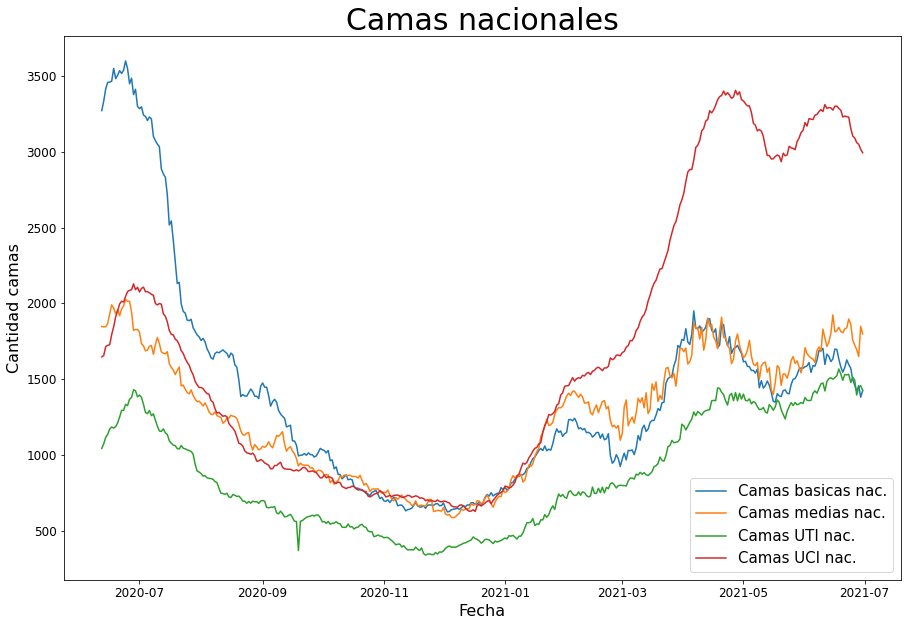

In [20]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(data.iloc[:,[0,1,2,3]])
ax1.legend(('Camas basicas nac.', 'Camas medias nac.', 'Camas UTI nac.',
       'Camas UCI nac.'), fontsize=15 , loc=4)
plt.title("Camas nacionales", fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Cantidad camas", fontsize=16)

Text(0, 0.5, 'Cantidad camas')

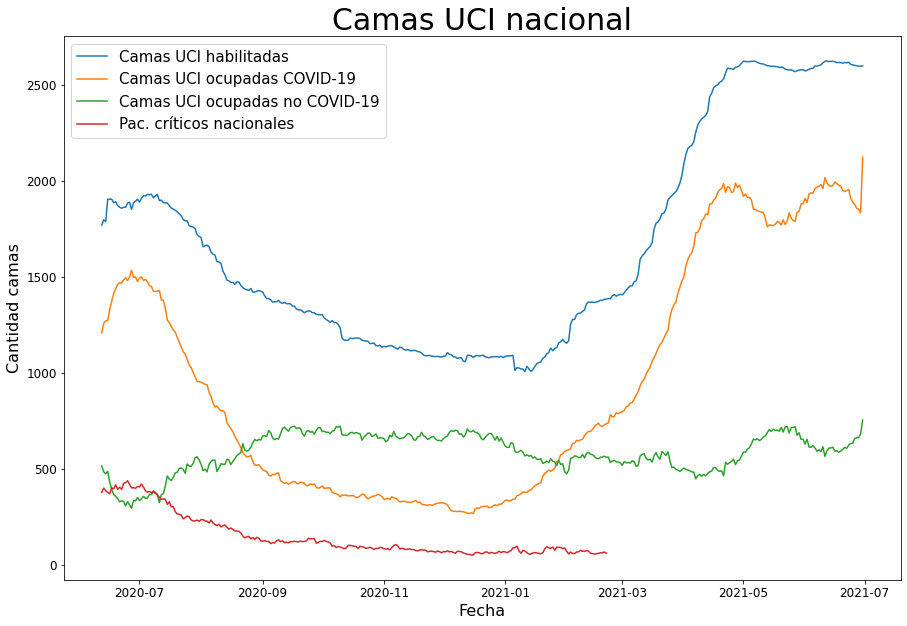

In [21]:
fig, ax2 = plt.subplots(1, 1)
ax2.plot(data.iloc[:,[15,16,17,23]])
ax2.legend(('Camas UCI habilitadas',
       'Camas UCI ocupadas COVID-19', 'Camas UCI ocupadas no COVID-19', 'Pac. críticos nacionales'), fontsize=15)
plt.title("Camas UCI nacional", fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Cantidad camas", fontsize=16)

Text(0, 0.5, 'Personas con comorbilidad')

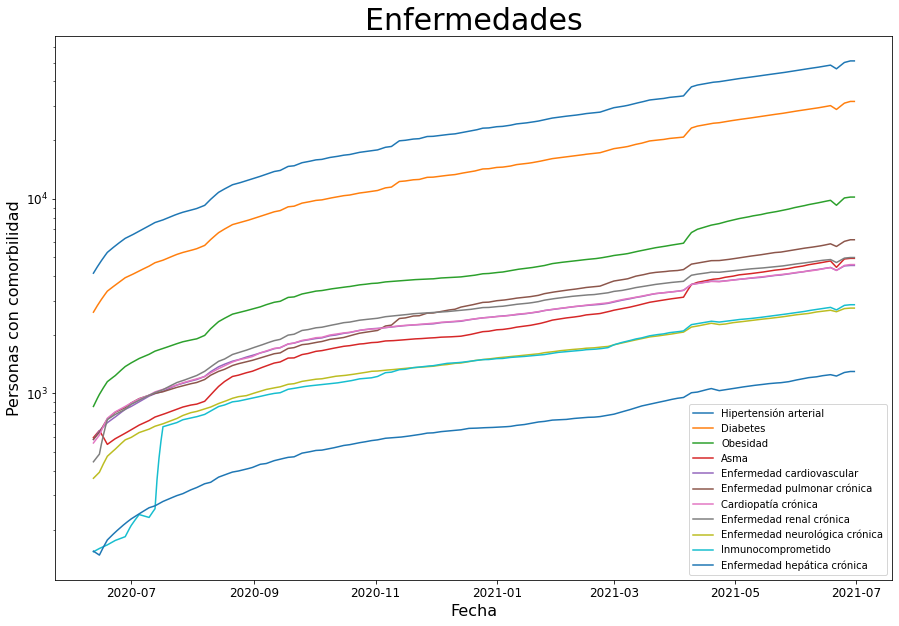

In [22]:
fig, ax3 = plt.subplots(1, 1)
ax3.plot(data.iloc[:,[4,5,6,7,8,9,10,11,12,13,14]])
ax3.legend(('Hipertensión arterial', 'Diabetes', 'Obesidad',
       'Asma', 'Enfermedad cardiovascular', 'Enfermedad pulmonar crónica',
       'Cardiopatía crónica', 'Enfermedad renal crónica',
       'Enfermedad neurológica crónica','Inmunocomprometido',
       'Enfermedad hepática crónica'))
plt.yscale('log')
plt.title("Enfermedades", fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Personas con comorbilidad", fontsize=16)

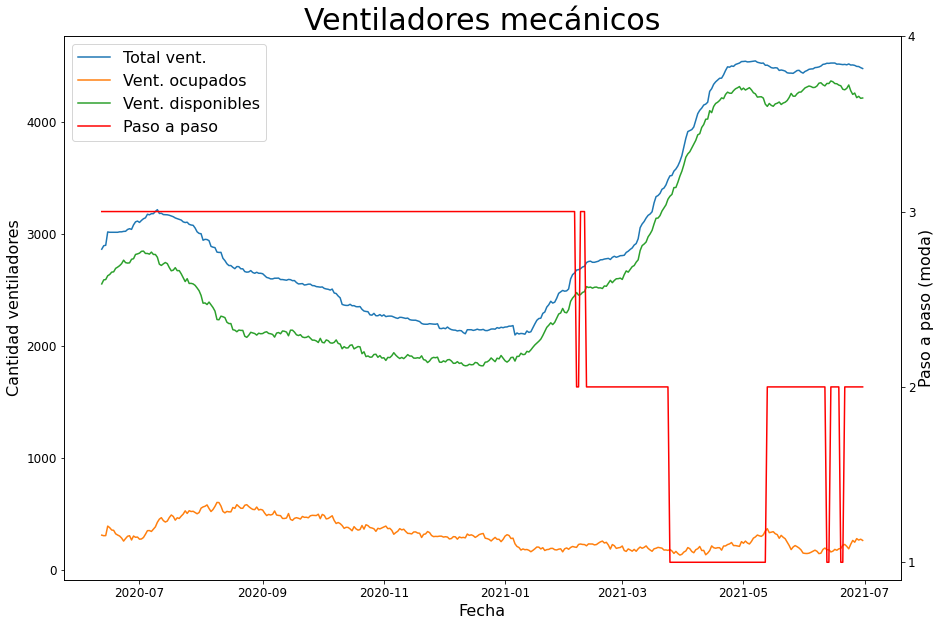

In [23]:
fig, ax4 = plt.subplots(1, 1)
ventiladores_plot = ax4.plot(data.iloc[:,[20,21,22]])
#ax4.legend(('Total vent.', 'Vent. ocupados',
       #'Vent. disponibles'), fontsize=15)
plt.title("Ventiladores mecánicos", fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Cantidad ventiladores", fontsize=16)
ax5 = ax4.twinx()
pasos_plot = ax5.plot(data.iloc[:,26], color="red")
ax5.set_yticks([1, 2, 3, 4])
plt.ylabel("Paso a paso (moda)", fontsize=16)
#ax5.set_ytickslabels(("Paso 1", "Paso 2", "Paso 3", "Paso 4"))
plot = ventiladores_plot + pasos_plot
ax4.legend(plot, ["Total vent.", "Vent. ocupados", "Vent. disponibles", "Paso a paso"], fontsize=16)

Text(0, 0.5, 'Casos activos')

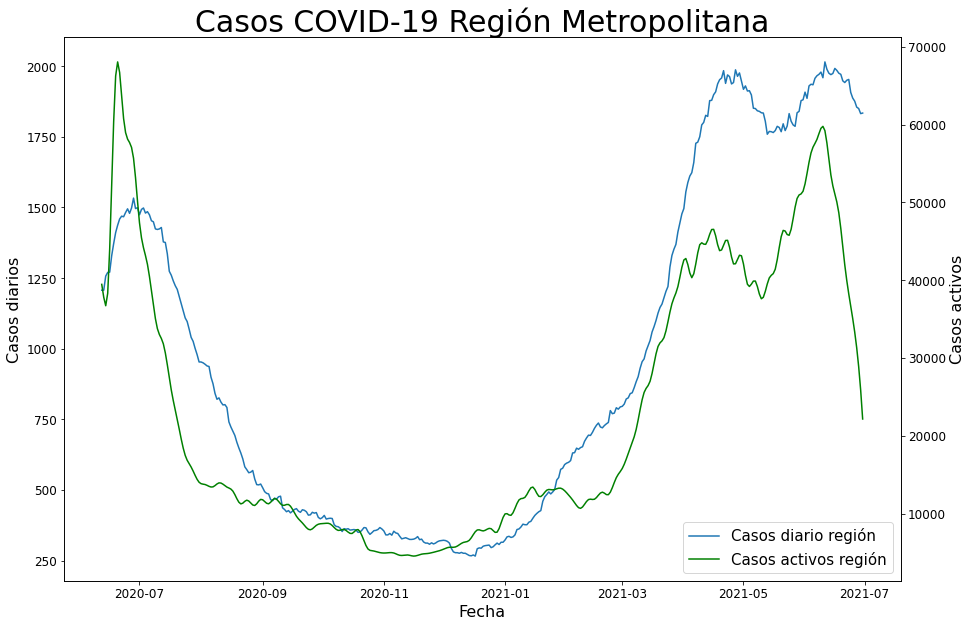

In [24]:
fig, ax5 = plt.subplots(1, 1)
diarios_plot = ax5.plot(data.iloc[:,24])
plt.title("Casos COVID-19 Región Metropolitana", fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Casos diarios", fontsize=16)
ax6 = ax5.twinx()
activos_plot = ax6.plot(data.iloc[:,25], color="green")
plot = diarios_plot + activos_plot
ax5.legend(plot, ["Casos diario región", "Casos activos región"], fontsize=15, loc=4)
plt.ylabel("Casos activos", fontsize=16)

Text(0, 0.5, 'Cantidad ventiladores')

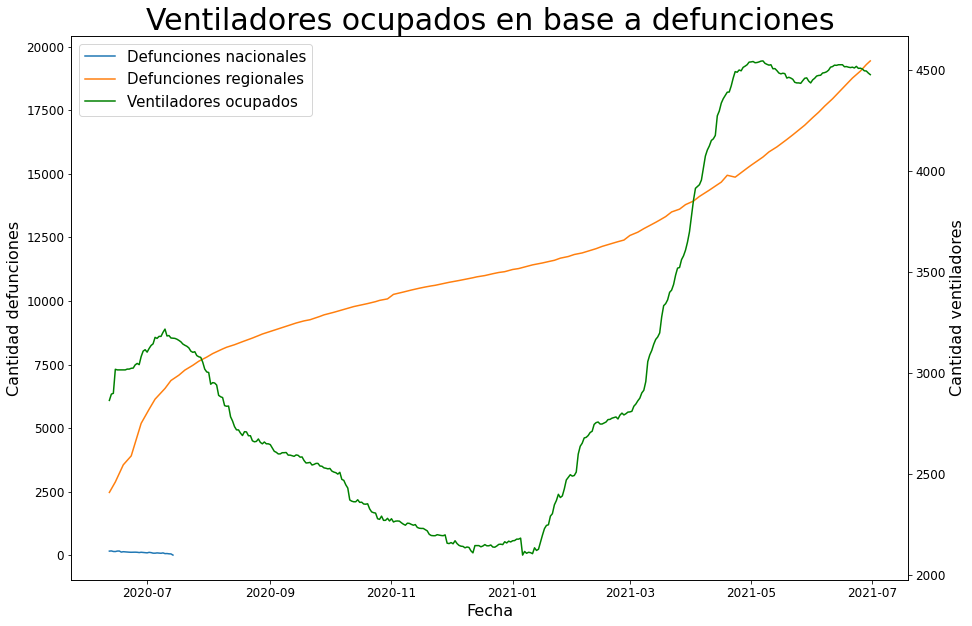

In [25]:
fig, ax7 = plt.subplots(1, 1)
defunciones_plot = ax7.plot(data.iloc[:,[18,19]])
#ax7.legend(('Defunciones', 'Vent. ocupados'), fontsize=15)
plt.title("Ventiladores ocupados en base a defunciones", fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Cantidad defunciones", fontsize=16)
ax8 = ax7.twinx()
ventiladores_plot = ax8.plot(data.iloc[:,20], color="green")
plot = defunciones_plot + ventiladores_plot
ax8.legend(plot, ["Defunciones nacionales", "Defunciones regionales", "Ventiladores ocupados"], fontsize=15)
plt.ylabel("Cantidad ventiladores", fontsize=16)

## Limpieza de variables
### Se eliminan variables con datos faltantes incluso después de la interpolación.
Candidatos: 
 - Pacientes críticos
 - Defunciones nacional 

In [26]:
data = data.drop(labels=["Pac. criticos nacional", "Defunciones nacional"], axis=1)

Revisando que no queden datos faltantes

In [27]:
data.isnull().sum(axis=1)

2020-06-12    0
2020-06-13    0
2020-06-14    0
2020-06-15    0
2020-06-16    0
2020-06-17    0
2020-06-18    0
2020-06-19    0
2020-06-20    0
2020-06-21    0
2020-06-22    0
2020-06-23    0
2020-06-24    0
2020-06-25    0
2020-06-26    0
2020-06-27    0
2020-06-28    0
2020-06-29    0
2020-06-30    0
2020-07-01    0
2020-07-02    0
2020-07-03    0
2020-07-04    0
2020-07-05    0
2020-07-06    0
2020-07-07    0
2020-07-08    0
2020-07-09    0
2020-07-10    0
2020-07-11    0
2020-07-12    0
2020-07-13    0
2020-07-14    0
2020-07-15    0
2020-07-16    0
2020-07-17    0
2020-07-18    0
2020-07-19    0
2020-07-20    0
2020-07-21    0
2020-07-22    0
2020-07-23    0
2020-07-24    0
2020-07-25    0
2020-07-26    0
2020-07-27    0
2020-07-28    0
2020-07-29    0
2020-07-30    0
2020-07-31    0
2020-08-01    0
2020-08-02    0
2020-08-03    0
2020-08-04    0
2020-08-05    0
2020-08-06    0
2020-08-07    0
2020-08-08    0
2020-08-09    0
2020-08-10    0
2020-08-11    0
2020-08-12    0
2020-08-

## Visualización y análisis de correlación

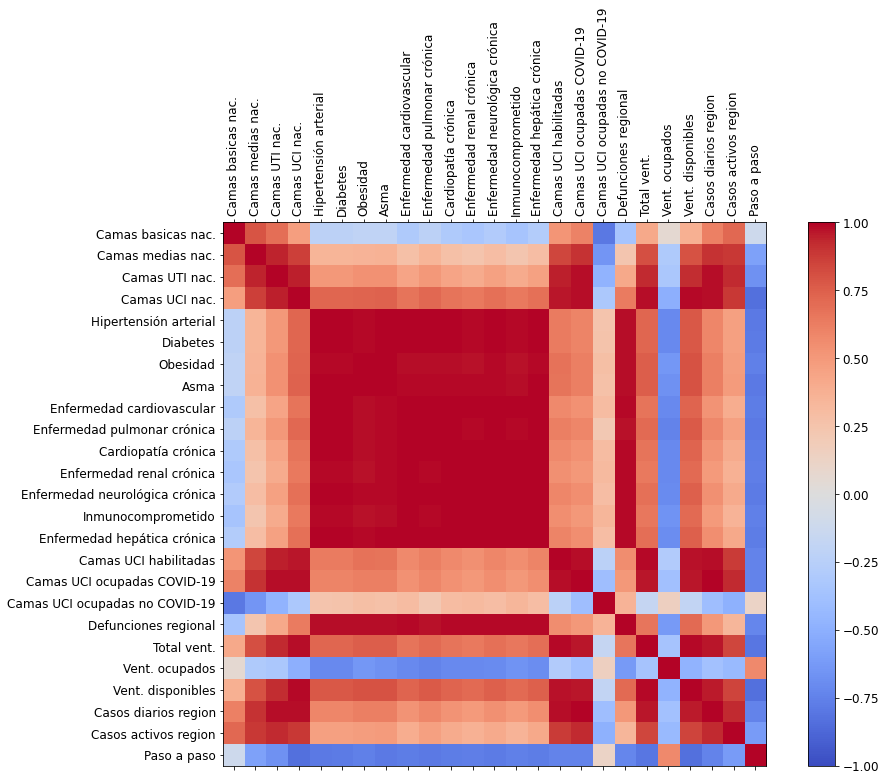

In [28]:
corr = data.corr(method="pearson")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [29]:
corr

,Camas basicas nac.,Camas medias nac.,Camas UTI nac.,Camas UCI nac.,Hipertensión arterial,Diabetes,Obesidad,Asma,Enfermedad cardiovascular,Enfermedad pulmonar crónica,...,Camas UCI habilitadas,Camas UCI ocupadas COVID-19,Camas UCI ocupadas no COVID-19,Defunciones regional,Total vent.,Vent. ocupados,Vent. disponibles,Casos diarios region,Casos activos region,Paso a paso
Camas basicas nac.,1.000000,0.794989,0.691557,0.473381,-0.224191,-0.223546,-0.201194,-0.202001,-0.300963,-0.220249,...,0.517963,0.609354,-0.796415,-0.344792,0.415443,0.061681,0.382552,0.610986,0.712323,-0.112038
Camas medias nac.,0.794989,1.000000,0.944689,0.864451,0.346805,0.347294,0.358681,0.364988,0.277774,0.351502,...,0.838191,0.902634,-0.642458,0.235527,0.807464,-0.302399,0.802827,0.902638,0.884021,-0.582756
Camas UTI nac.,0.691557,0.944689,1.000000,0.948444,0.507118,0.507799,0.535813,0.532821,0.438682,0.501793,...,0.952419,0.981994,-0.470958,0.414629,0.927399,-0.324469,0.918865,0.982511,0.925610,-0.668621
Camas UCI nac.,0.473381,0.864451,0.948444,1.000000,0.722160,0.722135,0.733443,0.739929,0.669690,0.718561,...,0.964419,0.978583,-0.319801,0.637939,0.976976,-0.492257,0.989109,0.978411,0.885783,-0.834249
Hipertensión arterial,-0.224191,0.346805,0.507118,0.722160,1.000000,0.999986,0.991389,0.996639,0.995674,0.997801,...,0.633649,0.597412,0.249626,0.980785,0.721630,-0.704845,0.778505,0.593025,0.464626,-0.782878
Diabetes,-0.223546,0.347294,0.507799,0.722135,0.999986,1.000000,0.991880,0.996820,0.995482,0.997624,...,0.634267,0.597751,0.250752,0.980932,0.722067,-0.703572,0.778738,0.593348,0.465068,-0.781020
Obesidad,-0.201194,0.358681,0.535813,0.733443,0.991389,0.991880,1.000000,0.997323,0.983399,0.981698,...,0.672597,0.622794,0.286336,0.979335,0.753303,-0.637573,0.798885,0.618613,0.483347,-0.752885
Asma,-0.202001,0.364988,0.532821,0.739929,0.996639,0.996820,0.997323,1.000000,0.990460,0.989542,...,0.666862,0.622432,0.265688,0.977633,0.750855,-0.666967,0.800708,0.618156,0.485928,-0.783140
Enfermedad cardiovascular,-0.300963,0.277774,0.438682,0.669690,0.995674,0.995482,0.983399,0.990460,1.000000,0.993713,...,0.573754,0.533189,0.299266,0.986601,0.670252,-0.704160,0.730028,0.528850,0.397792,-0.769887
Enfermedad pulmonar crónica,-0.220249,0.351502,0.501793,0.718561,0.997801,0.997624,0.981698,0.989542,0.993713,1.000000,...,0.617362,0.590293,0.217653,0.975332,0.706779,-0.736822,0.769010,0.585831,0.462737,-0.787736


## Preparación de los datos

### Pacientes críticos acumulados a diarios

In [30]:
defunc_ix = list(data.columns).index("Defunciones regional")

In [31]:
from sklearn.preprocessing import MinMaxScaler
X = data.copy()
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.columns, index=data.index)

ind = int(X.shape[0]*0.7)
ind_name = data.index[ind]
ind_name_nxt = data.index[ind+1]
#y_index = list(data.columns).index("Camas UCI ocupadas COVID-19")

y_lab = "Camas UCI nac."

X_train = X.loc[:ind_name, X.columns != y_lab]
X_test = X.loc[ind_name_nxt:, X.columns != y_lab]
y_train = X.loc[:ind_name, "Camas UCI nac."]
y_test = X.loc[ind_name_nxt:, "Camas UCI nac."]

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
#from sklearn.preprocessing import StandardScaler

#defunc_ix, bedrooms_ix, population_ix, household_ix = [
#    list(housing.columns).index(col)
#    for col in ("total_rooms", "total_bedrooms", "population", "households")]
defunc_ix = list(X_train.columns).index("Defunciones regional")
# = data.iloc[:, defunc_ix]
class DataFormatter(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def acum_to_daily(self, X, y=None):
        temp_defunc = X[:, defunc_ix]
        defunc_diario = [temp_defunc[i] - temp_defunc[i-1] for i in range(X.shape[0]-1,0,-1)]
        defunc_diario = np.flip(defunc_diario).tolist()
        defunc_diario[0] = 0
        defunc_diario.append(temp_defunc[X.shape[0]-1])
        X[:,defunc_ix] = defunc_diario
        return X
        #return np.c_[X, defunc_diario]
    def scale_data(self, X, y=None):
        scaler = MinMaxScaler(feature_range=(0, 1))
        data_scaled = scaler.fit_transform(X)
        return data_scaled

formatter = DataFormatter()


In [33]:
data_prec_train = formatter.acum_to_daily(X_train.values)
data_prec_test = formatter.acum_to_daily(X_test.values)

In [34]:
#data_prec_train_norm = formatter.scale_data(data_prec_train)
#data_prec_test_norm = formatter.scale_data(data_prec_test)

In [35]:
x_train = pd.DataFrame(
    data=data_prec_train,
    columns=list(X_train.columns),
    index=X_train.index)

x_test = pd.DataFrame(
    data=data_prec_test,
    columns=list(X_test.columns),
    index=X_test.index)

In [36]:
x_train.shape

(269, 24)

In [37]:
y_train.shape

(269,)

## Eliminación de variables por importancia

In [38]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
x_train2 = x_train.drop(["Diabetes", "Obesidad", "Enfermedad cardiovascular","Enfermedad hepática crónica", "Enfermedad pulmonar crónica", "Cardiopatía crónica", "Enfermedad renal crónica", "Inmunocomprometido", "Enfermedad neurológica crónica","Paso a paso"], axis=1)
x_test2 = x_test.drop(["Diabetes", "Obesidad", "Enfermedad cardiovascular","Enfermedad hepática crónica", "Enfermedad pulmonar crónica", "Cardiopatía crónica", "Enfermedad renal crónica", "Inmunocomprometido", "Enfermedad neurológica crónica","Paso a paso"], axis=1)

In [ ]:
model.fit(x_train2, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train2.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

In [ ]:
# Hacer plot de importancia

## Eliminar variables correlacionadas

In [ ]:
corr = x_train2.corr(method="pearson")
corr

In [ ]:

cor_matrix = corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#upper_tri.iloc[4,:] > 0.90
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)

#data_dropped = x_train.copy()
#data_dropped = data_dropped.drop(to_drop, axis=1)

In [ ]:
x_train3 = x_train2.drop(["Hipertensión arterial", "Camas UTI nac.", "Camas UCI ocupadas COVID-19", "Camas UCI habilitadas", 'Camas medias nac.', 'Vent. disponibles', 'Casos activos region'], axis=1)
x_test3 = x_test2.drop(["Hipertensión arterial", "Camas UTI nac.", "Camas UCI ocupadas COVID-19", "Camas UCI habilitadas", 'Camas medias nac.', 'Vent. disponibles', 'Casos activos region'], axis=1)
corr = x_train3.corr(method="pearson")
corr
#to_drop = x_train[["Enfermedad renal crónica", "Camas UCI nac.", ]]

In [ ]:
model.fit(x_train3, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train3.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

In [ ]:
x_train = x_train3.copy()
x_test = x_test3.copy()

In [ ]:
x_train = pd.merge(x_train, y_train, how='outer',left_index=True, right_index=True)
x_test = pd.merge(x_test, y_test, how='outer',left_index=True, right_index=True)

# Modelación

In [ ]:
#from sklearn.model_selection import TimeSeriesSplit

#test_size = round(0.25*data.shape[0])
#print(test_size)
#data_x = data.drop("Camas UCI ocupadas COVID-19", axis=1)
#data_y = data["Camas UCI ocupadas COVID-19"].copy()
#split = TimeSeriesSplit(data_x, data_y, test_size=test_size)
#for train_index, test_index in TimeSeriesSplit.split(data_x):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

In [ ]:
#data = strat_train_set.drop("Camas UCI ocupadas COVID-19", axis=1)
#uci = strat_train_set["Camas UCI ocupadas COVID-19"].copy()

## Modelo de regresión lineal

In [ ]:
#import sys
#!{sys.executable} -m pip install sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train3, y_train)

In [ ]:
linear_predct = lin_reg.predict(x_test3)
print("Predictions:", linear_predct)

In [ ]:
linear_predct = pd.Series(linear_predct)
linear_predct.index = x_test3.index

#print(y_test)
#print(linear_predct.index)
y_test.corr(linear_predct)

data_linear = pd.concat([y_test, linear_predct], axis=1)

In [ ]:
fig, ax4 = plt.subplots(1, 1)
ax4.plot(data_linear)
ax4.legend(('Valores referencia', 'Valores predichos'), fontsize=15)
plt.title("Predicción Regresión Lineal", fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("UCI ocupadas", fontsize=16)

In [ ]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, linear_predct)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, linear_predct)
lin_mae

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

In [ ]:
tree_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## Retrasos

In [ ]:
look_back = 2

In [ ]:
# Function to create the data set
# Equation f(yt) = f(yt-1)
# convert an array of values into a dataset matrix
def create_dataset(name, dataset, look_back=1):
    dataX, dataY = [], []
    names = [(name + "_t-" + str(i)) for i in range(look_back)]
    names.reverse()
    dt = dataset.values
    for i in range(len(dt)-look_back-1):
        a = dt[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dt[i + look_back])
    indices = dataset.index[(look_back+1):]
    dataset_ret = pd.DataFrame(dataX, columns=names, index=indices)
    return dataset_ret#np.array(dataX), np.array(dataY)

In [ ]:
# Insertar retardos en dataset de features train
dt_train = pd.DataFrame()
for col in x_train.columns:
    var = x_train[col]
    var_ret = create_dataset(col, var, look_back)
    selected_cols = var_ret.columns[:-1] # Remove Xt-0
    var_ret = var_ret[selected_cols]
    dt_train[selected_cols] = var_ret
x_train = pd.DataFrame(dt_train)

In [ ]:
# Insertar retardos en dataset de features test
dt_test = pd.DataFrame()
for col in x_test.columns:
    var = x_test[col]
    var_ret = create_dataset(col, var, look_back)
    selected_cols = var_ret.columns[:-1] # Remove Xt-0
    var_ret = var_ret[selected_cols]
    dt_test[selected_cols] = var_ret
x_test = pd.DataFrame(dt_test)

In [ ]:
# Insertar retardos en dataset de features test
y_lab_t0 = y_lab + "_t-0"

y_train = create_dataset(y_lab, y_train, look_back)
y_train = y_train[[y_lab_t0]]
y_test = create_dataset(y_lab, y_test, look_back)
y_test = y_test[[y_lab_t0]]

## Aplicar Multilayer Perceptron model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=2, verbose=2)

In [ ]:
from math import sqrt
# Estimate model performance
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, sqrt(testScore)))

In [ ]:
# Generate predictions for training
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

In [ ]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(data[[y_lab]])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(data[[y_lab]])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

In [ ]:
trainPredictPlot = pd.DataFrame(trainPredictPlot, index=data.index)
testPredictPlot = pd.DataFrame(testPredictPlot, index=data.index)

In [ ]:
# Plot original data and predictions
fig, ax = plt.subplots(figsize=(18,8)) # Tamaño del gráfico
plt.plot(X[[y_lab]], color="blue", label="Original data")

#Título del gráfico
ax.set_title('Predicción del número de camas UCI nacional')

# Define del eje y
ax.set_ylabel('Camas UCI')
plt.grid(True, 'major', 'y', ls='--', lw=1.5, c='k', alpha=.3)

#Define el eje x
plt.tick_params(axis='x', which='major', labelsize=12)

#plt.axis([0, 155,0,650])

plt.plot(trainPredictPlot, color="green", label="Train predict")
plt.plot(testPredictPlot, color="orange", label="Test predict")
ax.legend(loc="lower right", title="", frameon=False)


plt.show()

# LSTM

In [ ]:
x_train_temp = x_train
x_test_temp = x_test

In [ ]:
# reshape input to be [samples, time steps, features !=columnas]
features = round(x_train_temp.shape[1]/(look_back-1))
x_train_temp = np.reshape(x_train_temp.values, (x_train_temp.shape[0], features, look_back-1))
x_test_temp = np.reshape(x_test_temp.values, (x_test_temp.shape[0], features, look_back-1))

In [ ]:
# create and fit the LSTM network
batch_size = 1
look_forward = 14
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, features, look_back-1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, features, look_back-1), stateful=True))
model.add(Dense(look_forward))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
y_train_temp = y_train
y_test_temp = y_test

In [ ]:
for i in range(100):
    model.fit(x_train_temp, y_train_temp.values, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

In [ ]:
# make predictions
trainPredict = model.predict(x_train_temp, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(x_test_temp, batch_size=batch_size)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#y_train = scaler.inverse_transform([y_train])
#testPredict = scaler.inverse_transform(testPredict)
#y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = sqrt(mean_squared_error(y_train_temp.values[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(y_test_temp.values[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
#trainPredict_temp = trainPredict
#testPredict_temp = testPredict

In [ ]:
trainPredict = trainPredict[:,0]

In [ ]:
testPredict.shape

In [ ]:
#today = testPredict.shape[0]
testPredictActual = testPredict[:,0]
testPredictFuture = testPredict[-1,0:]


In [ ]:
from datetime import datetime

Y = X[[y_lab]]
last_date = data.index[-1]
predicted_dates = pd.date_range(start = last_date, periods = 14).to_pydatetime().tolist()
Y = Y.reindex(Y.index.union(predicted_dates))
#new_len = len(trainPredict) + len(predicted_dates)

In [ ]:
from copy import deepcopy
# Create datasets for plotting
base = np.empty_like(Y)
base[:] = np.nan

In [ ]:
# Create reference data
referencePlot = deepcopy(base[:])
referencePlot[:len(X),:] = X[[y_lab]]
referencePlot = pd.DataFrame(referencePlot, columns=['Reference values'], index=Y.index)

In [ ]:
# Create train predict data
trainPredictPlot = deepcopy(base[:])
trainPredictPlot[look_back:len(trainPredict)+look_back,0] = trainPredict[:]
trainPredictPlot = pd.DataFrame(trainPredictPlot, columns=['Predicted Training'], index=Y.index)

In [ ]:
# Create test predict data
testPredictPlot = deepcopy(base[:])
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(base)-len(testPredictFuture),0] = testPredictActual[:]
testPredictPlot = pd.DataFrame(testPredictPlot, columns=['Predicted Testing'], index=Y.index)

In [ ]:
# Create predicted data
predictedFuturePlot = deepcopy(base[:])
predictedFuturePlot[len(base)-len(testPredictFuture):,0] = testPredictFuture[:]
predictedFuturePlot = pd.DataFrame(predictedFuturePlot, columns=['Predicted Future'],index=Y.index)

In [ ]:
plotData = pd.merge(referencePlot, trainPredictPlot, how='outer', left_index=True, right_index=True)
plotData = pd.merge(plotData, testPredictPlot, how='outer', left_index=True, right_index=True)
plotData = pd.merge(plotData, predictedFuturePlot, how='outer', left_index=True, right_index=True)

In [ ]:
plotData

In [ ]:
 fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(plotData)
#Título del gráfico
plt.title('Red Neuronal LSTM2', fontsize=30)
plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Camas UCI Normalizado", fontsize=16)
ax.grid(True, 'major', 'y', ls='--', lw=1.5, c='k', alpha=.3)
ax.legend(plotData.columns,loc='upper left')
plt.show()